# Introduction
In this notebook we will present a sample of the images available and we will start to explore some of their characteristics.

### Imports
Import libraries and write settings here.

In [1]:
# Data manipulation
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30
pd.options.display.float_format = '{:,.4f}'.format

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Visualizations
import seaborn as sns
#import plotly.plotly as py
#import plotly.graph_objs as go
#from plotly.offline import iplot, init_notebook_mode
#init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(theme='white')

/home/luca/anaconda3/envs/tensorflow/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:558: DeprecationWarning:

plotly.graph_objs.YAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.YAxis
  - plotly.graph_objs.layout.scene.YAxis


/home/luca/anaconda3/envs/tensorflow/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:531: DeprecationWarning:

plotly.graph_objs.XAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.XAxis
  - plotly.graph_objs.layout.scene.XAxis




## General packages 

In [2]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
import cv2

## Custom modules 

In [3]:
import sys
code_path = "../code"
sys.path.append(code_path)

from config_script import *
import data_exploration

# Data Exploration
The data available are 4 images of size 1600x1200 pixels. They are RGB pictures of mouse brain slices.

## Raw data 

The raw images look as follow

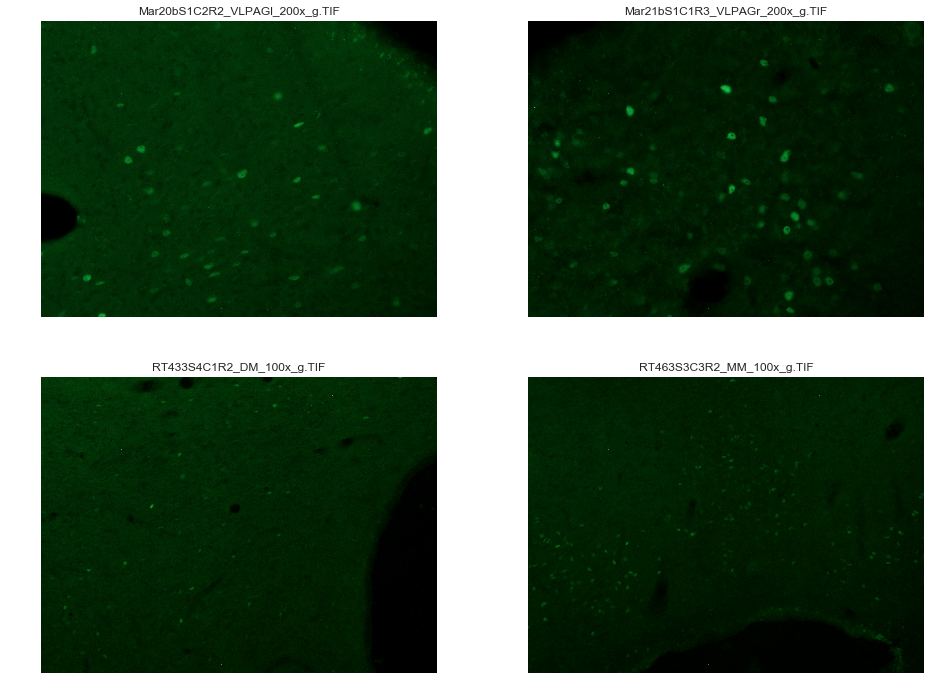

In [4]:
fig = plt.figure(figsize=(16, 12))
for i, img_name in enumerate(sample_images):
    img_path = SAMPLE_IMG_PATH / img_name
    # read image in BGR
    img = cv2.imread(str(img_path), cv2.IMREAD_COLOR)
    # backtransform to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    sb = plt.subplot(2, 2, i+1)
    plot = plt.title(img_name)
    plot = plt.axis('off')
    plot = plt.imshow(img)

Also, segmentation mask are available after some dedicated processing.

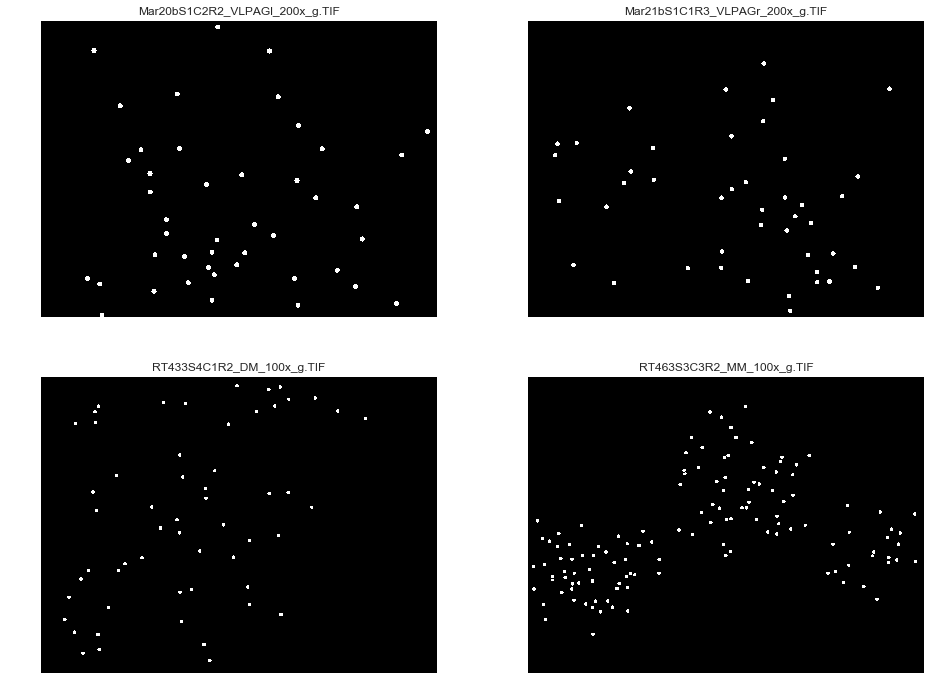

In [5]:
fig = plt.figure(figsize=(16, 12))
for i, img_name in enumerate(sample_images):
    img_path = SAMPLE_MASKS_PATH / img_name
    # read image in BGR
    img = cv2.imread(str(img_path), cv2.IMREAD_COLOR)
    # backtransform to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    sb = plt.subplot(2, 2, i+1)
    plot = plt.title(img_name)
    plot = plt.axis('off')
    plot = plt.imshow(img)

## Colour channels distributions 

Let's now investigate how the 3 coulor channels are populated.

In [6]:
sns.set(style="whitegrid")

red_channels = []
green_channels = []
blue_channels = []

# plot pixel distribution
for i, img_name in enumerate(sample_images):
    img_path = SAMPLE_IMG_PATH / img_name
    # read image in BGR
    img = cv2.imread(str(img_path), cv2.IMREAD_COLOR)
    # backtransform to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    r, g, b = cv2.split(img)
    red_channels.append(r.flatten())
    green_channels.append(g.flatten())
    blue_channels.append(b.flatten())

dfr = pd.DataFrame(list(map(list, zip(*red_channels))),
                   columns=sample_images).assign(Color="Red")
dfg = pd.DataFrame(list(map(list, zip(*green_channels))),
                   columns=sample_images).assign(Color="Green")
dfb = pd.DataFrame(list(map(list, zip(*blue_channels))),
                   columns=sample_images).assign(Color="Blue")
cdf = pd.concat([dfr, dfg, dfb])
mdf = pd.melt(cdf, id_vars=['Color'], var_name=[
              'Image'], value_name="Intensity")

palette = [#"lightcoral", "indianred", "brown", "firebrick",  # red palette
           "palegreen", "lightgreen", "forestgreen", "limegreen"]  # green palette
           #"cornflowerblue", "royalblue", "navy", "mediumblue"]  # blue palette

Text(0.5, 1.0, 'Violin plot of pixel intensity divided by channels')

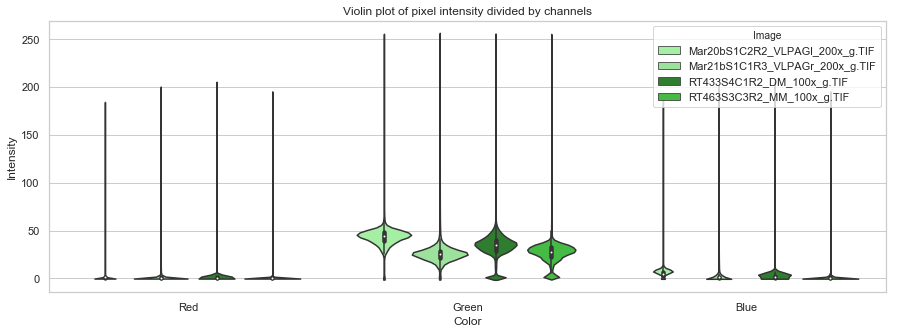

In [8]:
fig = plt.figure(figsize=(15, 5))
ax = sns.violinplot(x="Color", y="Intensity", palette=palette, #"Pastel2",
                    hue="Image", data=mdf)
ax.set_title('Violin plot of pixel intensity divided by channels')
    
plot = plt.show()

As you can see, red and blue channels are very sparsely populated. Thus the images are basically greenscale.

## RGB VS HSV colourspace 

There is no guarantee that the starting colourspace is the optimal one for the problem at hand. Therefore we may want to investigate a colourspace transformation.

Let us try a transformation to HSV (Hue, Saturation, Value).

<div class="alert alert-block alert-warning">
   <b>Notice that 3D plots take time!!

   Wall time: 13min 50s </b>
</div>

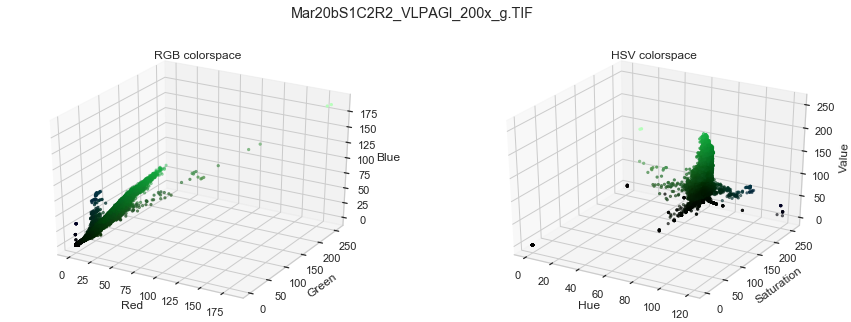

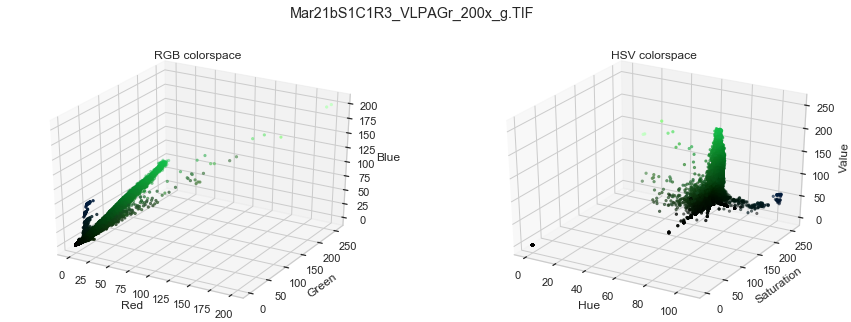

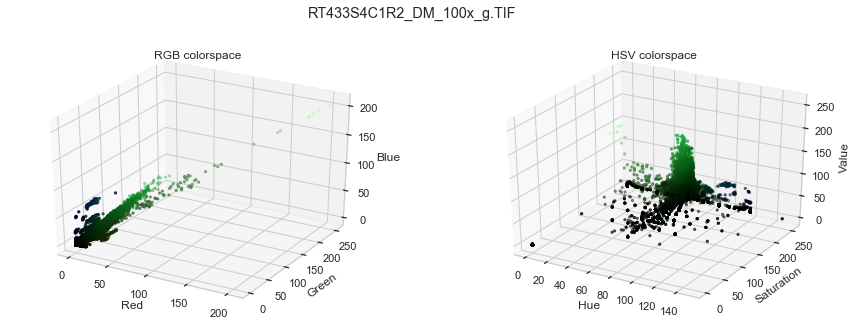

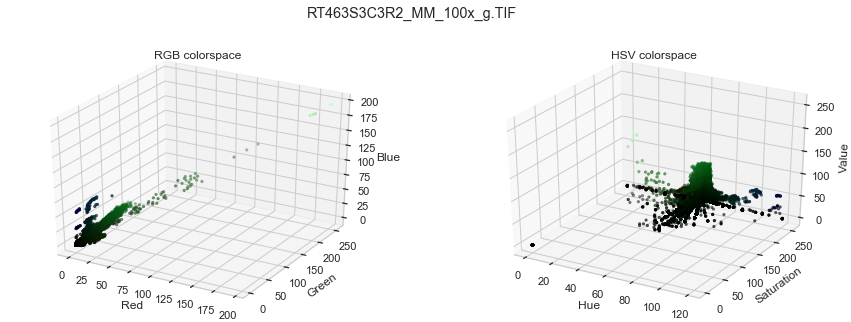

CPU times: user 13min 51s, sys: 15 s, total: 14min 6s
Wall time: 13min 50s


In [9]:
%%time

for i, img_name in enumerate(sample_images):
    img_path = SAMPLE_IMG_PATH / img_name
    # read image in BGR
    img = cv2.imread(str(img_path), cv2.IMREAD_COLOR)
    # backtransform to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plot = data_exploration.plot_3Dcolorspace(img, ['RGB', 'HSV'], img_name)
    plt.show()